## Primer entregable. Ampliación de Inteligencia Artificial - Curso 22-23

## Ejercicio scikit learn

###  Nombre: Rubén Jiménez Jiménez (rubjimjim)

### Plazo de entrega: 17 de abril (0.75 puntos de la nota total)

### HONESTIDAD ACADÉMICA Y COPIAS: 

La realización de los ejercicios es un trabajo personal, por lo que deben completarse por cada estudiante de manera individual.  

Cualquier plagio o compartición de código que se detecte significará automáticamente la calificación de **CERO EN LA ASIGNATURA** para **TODOS** los alumnos involucrados. Por tanto a estos alumnos NO se les conservará, para futuras convocatorias, ninguna nota que hubiesen obtenido hasta el momento. Independientemente de **OTRAS ACCIONES DE CARÁCTER DISCIPLINARIO** que se pudieran tomar.

****

### IMPORTANTE: Comentar y explicar adecuadamente cada paso realizado.

#### En este ejercicio, <u>es muy importante el comentar adecuadamente cada paso</u> dado. Los comentarios, que han de ser originales, deberán explicar  todo lo realizado, de manera que se demuestre que se conocen y manejan adecuadamente los conceptos y las herramientas que se usan. Estas explicaciones y comentarios serán parte muy importante de la nota.

****

# ENUNCIADO

Se pide aplicar modelos de _**random forest**_ o de _**máquinas de vectores soporte**_ (SVM) a dos conjuntos de datos que ya hemos visto en clase. Estos datos son:
* Imágenes de dígitos manuscritos
* Críticas de películas en IMDB

**Con el estudio de estos dos conjuntos de datos, y con UNO de los modelos anteriores (random forest o SVM) en principio es posible obtener la máxima puntuación del ejercicio.**

Sin embargo, **opcionalmente** se pueden aplicar los dos modelos (random forest y SVM) y sustituir uno de los *datasets* por un tercer conjunto de datos de libre elección (aunque daremos un par de sugerencias más adelante). 

En general, estas son algunas de las técnicas que se podrían aplicar en el estudio de cada caso: 

* Exploración preliminar del conjunto de datos
* Visualización de algunas características 
* Uso de clasificadores (o de modelos de regresión), en su caso
* Separación de ejemplos para test
* Métricas
* Validación cruzada
* Ajuste de parámetros con `GridSearchCV`
* Mostrar la predicción sobre ejemplos individuales

Las clases de Scikit Learn que implementan los respectivos modelos son:

* `RandomForestClassifier` del módulo `ensemble`, para *random forests*. 
* `SVC` del módulo `svm`, para *máquinas de vectores soporte*

Ambos modelos están explicados en las diapositivas y en los correspondientes vídeos del tema de Complementos de Aprendizaje Automático

**Se pide explicar, usando los dos conjuntos de datos anteriores, uno de estos modelos, y los principales argumentos y parámetros de las correspondientes clases. Los comentarios deben reflejar que se ha comprendido el modelo, su aprendizaje y la manera en la que clasifica nuevas instancias.** 

*****

Pasamos ahora a describir los conjuntos de datos. Estos datos ya se han usado en alguna práctica de clase, pero volvemos a presentarlos. 

## 1. Imágenes de dígitos escritos a mano

El conjunto de datos de dígitos escritos a mano se puede cargar en sklearn directamente (consultar los detalles en el manual):

In [87]:
from sklearn.datasets import load_digits
digitos = load_digits()

Podemos incluso visualizar cada dígito del conjunto de datos, y su clase:

<Figure size 640x480 with 0 Axes>

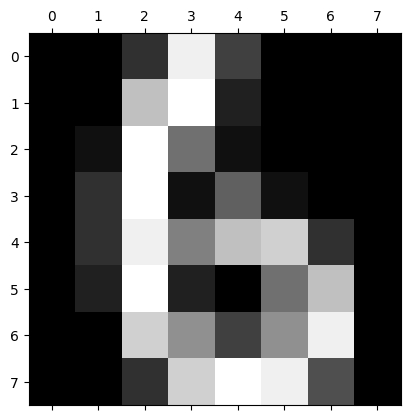

Clase de la imagen: 6


In [88]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digitos.images[234]) 
plt.show() 
print("Clase de la imagen: {}".format(digitos.target[234]))

Este conjunto de datos se puede usar de dos formas:

* Aprender un clasificador multiclase
* Observando la matriz de confusión del clasificador multiclase, elegir un par de dígitos que puedan tener algunas predicciones intercambiadas y aprender un clasificador binario para ese problema (el de distinguir entre esos dos dígitos).

Con los modelos finalmente aprendidos, mostrar con las imágenes del dígito, algún ejemplo que se clasifique bien y alguno que se clasifique mal. 

### Exploración preliminar

* Descripción breve del conjunto de datos : 

In [89]:
digitos.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

* Mostramos el número de ejemplos contenidos en el dataset, así como sus posibles clases y características

    * Cada caracteristica representa el nivel de gris del pixel correspondiente en la imagen, de 0 a 16
    * Tenemos 1797 ejemplos en el dataset, con 64 caracteristicas cada uno (imagenes 8x8)
    * Existen 10 valores de clasificación, del 0 al 9 ambos inclusive
    

In [90]:

print("Número de filas y columnas del conjunto de datos: (num de ejemplos y de cols)", digitos.data.shape)
print("\nNombre de cada valor de clasificación (variable target):",digitos.target_names )
print("\nIdentificacion de las características:\n",digitos.feature_names)
print("\nArray con los valores de clasificacion de cada instancia: ", digitos.target)

Número de filas y columnas del conjunto de datos: (num de ejemplos y de cols) (1797, 64)

Nombre de cada valor de clasificación (variable target): [0 1 2 3 4 5 6 7 8 9]

Identificacion de las características:
 ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_

* Podemos observar las imagenes de la siguiente forma, aunque vendran dados como matrices con cada valor siendo un píxel como vimos antes

In [91]:
digitos.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

* Claramente así vemos poco, podemos utilizar matplotlib para mostrar algunos dígitos y ver como son realmente junto con su valor de clasificación real


<Figure size 640x480 with 0 Axes>

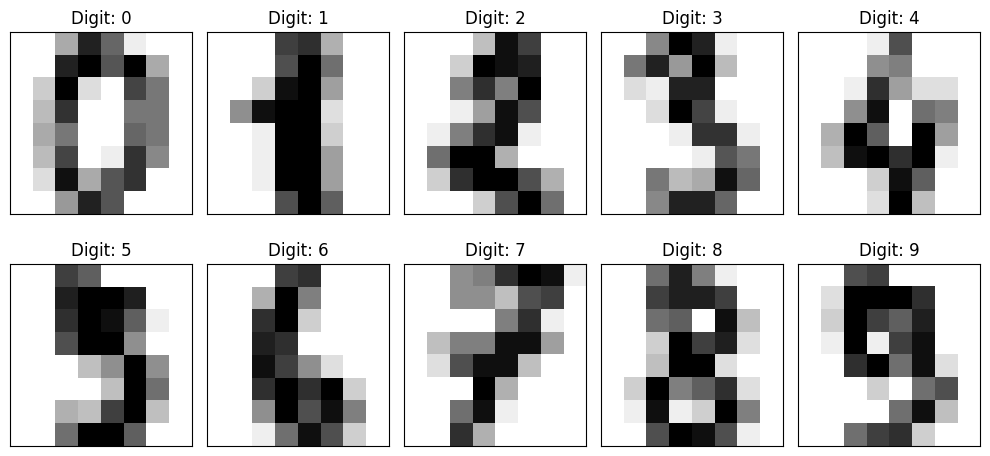

In [92]:
import matplotlib.pyplot as plt

plt.gray()

# Creamos un grid, o malla, de tamaño 2x5 con el que mostraremos un ejemplo de cada uno de los dígitos (0 a 9)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
# axes es una lista con cada "elemento" ax de la malla 2x5, en cada uno de ellos mostramos un dígito

# realmente no hacemos nada particular para que salga un ejemplo de cada dígito, los primeros ejemplos del
# dataset ya vienen ordenados, y como tenemos 10 "elementos" en la malla podemos aprovechar esto para mostrar los 10 casos
# posibles de clasificacion 

# se puede ampliar la malla para ver mas ejemplos

for ax, digito, clasificacion in zip(axes.flat, digitos.images, digitos.target):

    # Mostramos cada imagen, con el parámetro cmap ajustamos los colores, lo ponemos en escala de grises pues por defecto está al revés
    ax.imshow(digito, cmap=plt.cm.gray_r)
    ax.set_title('Digit: {}'.format(clasificacion))

    # Como solo queremos ver las imagenes, los marcadores de los ejes nos dan igual (ya sabemos que son 8x8) así que los quitamos
    # para no saturar y dejar el resultado más elegante
    ax.set_xticks([])
    ax.set_yticks([])

# tighy_layout() es completamente opcional y sólo está para que las imágenes no se tapen unas a otras en caso de ampliar la malla
plt.tight_layout()
plt.show()

* Aquí ya podemos ver que probablemente haya problemas al clasificar, por ejemplo, el 9 y el 5 se parecen bastante, al igual que el 2 y el 8, mientras que otros como el 1 y el 0 son claramente distinguibles, más adelante veremos como abordar estos problemas.

* A continuación haremos una visualización gráfica del conjunto de datos, para ello cargaremos los datos en las variables **X_digitos** e **y_digitos**

In [93]:
X_digitos,y_digitos = digitos.data,digitos.target

### Visualizacion de Características

* En clase vimos varios ejemplos de como utilizar matplotlib para visualizar las características de un dataset, por ejemplo, con el conjunto de datos **Iris** hicimos representaciones 2D en forma de nubes de puntos con 2 de sus características.

* Sin embargo algo como eso es de escasa utilidad aquí, teniendo digits **64 características** (píxeles) en lugar de las 4 que tiene el dataset Iris, comparar dos de ellas con una nube de puntos nos proporcionaría una visión muy limitada que nos ayudaría de poco

Para afrontar este problema una solución es realizar una **reducción de dimensionalidad**, lo que nos permite obtener los datos en espacio de menor dimensión y, por ejemplo, visualizarlos en un gráfico de dispersión como hicimos en clase.

* Una técnica muy utilizada para estos casos es el **Análisis de Componentes Principales** (**PCA**), nos permite retener la mayor cantidad de información posible mientras realizamos dicha reducción de dimensionalidad


A la hora de utilizar `PCA` podemos importarlo directamente de `sklearn.decomposition`

Crearemos el objeto `PCA`, para nuestro caso con 2 componentes principales para poder graficarlo, ahora tal y como vimos en clase ajustaremos el modelo a nuestros datos con el método `fit`, y haremos la representación de los datos originales en el nuevo espacio 2-dimensional con `transform` 
* En este caso no será necesario usar normalizadores como `StandardScaler` pues las características comparten la misma escala, por lo que no tendría sentido utilizarlo

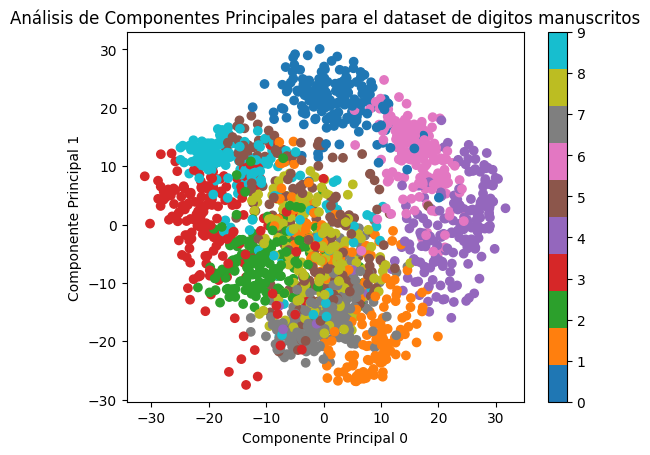

In [94]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Podemos hacer fit y transform a la vez de esta forma
pca = pca.fit_transform(X_digitos) 

# con c indicamos que coloree a partir de las posibles clases
# dibujamos el grafico con las nuevas 2 componenes que hay para cada elemento del dataset
plt.scatter(pca[:, 0], pca[:, 1], c=y_digitos, cmap='tab10') 
plt.xlabel('Componente Principal 0')
plt.ylabel('Componente Principal 1')
plt.title("Análisis de Componentes Principales para el dataset de digitos manuscritos")
plt.colorbar() # leyenda de colores
plt.show()

* Con el nuevo gráfico de dispersión podemos comprobar lo que ya sospechábamos, mientras que **el 0** (color azul) es **relativamente distingible** del resto, **otros como el 5 o el 8 se solapan muchísimo** y será más complicado poder distinguirlos.

## Clasificador Randomforest 

Antes que nada dividiremos nuestros datos en conjuntos de **entrenamiento**, que usaremos para aprender el modelo, y el de **prueba**, que sevirá para evaluar el rendimiento de dicho modelo (método holdout). Lo haremos con `train_test_split` del módulo `sklearn.model_selection` como ya hemos visto en clase.

* Hemos escogido una division en proporción 80-20 para datos de entrenamiento y pruebas.

* Más adelante, para evaluarlo, también utilizaremos el método de la **validación cruzada**.

In [95]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_digitos,y_digitos,test_size=0.2)

Importamos `RandomForestClassifier` del módulo `sklearn.ensemble`, y lo ajustamos a nuestros parámetros con el método `fit`

* Con el parámetro `n_estimators` indicamos el nº de árboles de decisión

* utilizamos `random_state` para establecer una semilla con la que reproducir los resultados, en principio, al volver a ejecutar el clasificador debería obtener los mismos resultados.

In [96]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100,random_state=20)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=20)

Ahora podemos comprobar su rendimiento, por ejemplo sobre datos  con `predict`, y calcular su "puntuacion" sobre un conjunto con `score`
* Nótese que aunque da un score de 100% de aciertos en el cjto de entrenamiento, con el de prueba desciende a alrededor de un 97%, que aunque sigue siendo muy buena puntuación, es menor.

In [98]:
import pandas as pd

# Al meterlo en esta funcion podemos reutilizarlo para otro dataset mas adelante, y con el parametro clasif, para otro 
# clasificador como un SVC
def imprime_predicciones(X_train,X_test,y_train,y_test,clasif):

    # Prediccion de los 10 primeros ejemplos del cjto de entrenamiento junto con su resultado esperado
    if(type(y_train)==pd.Series):

        # Cambio que realicé a empezar a trabajar con el segundo dataset, cuando son dataframes sólo queremos los valores, 
        # es sólamente estético
        print("Predicciones del modelo: {0} \nResultados esperados: {1}\n".format(clasif.predict(X_train[0:9]),y_train[0:9].values))
    else:
        print("Predicciones del modelo: {0} \nResultados esperados: {1}\n".format(clasif.predict(X_train[0:9]),y_train[0:9]))

    # Puntuación (porcentaje de aciertos) en entrenamiento y prueba, rfc.score los da como decimales, se han convertido a porcentajes
    # con round() redondeamos dicho porcentaje, en este caso a 3 cifras decimales.
    print("Puntuación sobre cjto de entrenamiento: {0}".format(round(float(clasif.score(X_train,y_train))*100,3)),"%\n")
    print("Puntuación sobre cjto de prueba: {0}".format(round(float(clasif.score(X_test,y_test))*100,3)),"%\n")

In [99]:
imprime_predicciones(X_train,X_test,y_train,y_test,clasif=rfc)

Predicciones del modelo: [0 3 9 9 4 3 3 2 2] 
Resultados esperados: [0 3 9 9 4 3 3 2 2]

Puntuación sobre cjto de entrenamiento: 100.0 %

Puntuación sobre cjto de prueba: 98.056 %



## Método de la validación cruzada

Como ya hemos estudiado el método de la **validacion cruzada** consiste en dividir el conjunto en k-partes de igual tamaño, con estas haremos k aprendizajes usando en cada uno una de las partes como test y el resto como entrenamiento

* Para utilizarlo importamos `cross_val_score` de `sklearn.model_selection`
* Es importante aclarar que estamos **evaluando** el modelo sobre los datos de digitos, no aprendiendolo.

In [100]:
from sklearn.model_selection import cross_val_score

# utilizamos cross_val_score introduciendo el modelo a evaluar (rfc)
# que en nuestro caso es nuestro randomForest, los conjuntos X e y de 
# los datos que usaremos, y con el parámetro cv determinamos el 
# numero de k-folds (pliegues)
scores = cross_val_score(rfc,X_digitos,y_digitos,cv=5)

print("Puntuaciones obtenidas en cada pliegue(fold): ",scores)
print("Puntuación media obtenida: ", scores.mean())

Puntuaciones obtenidas en cada pliegue(fold):  [0.92222222 0.9        0.96100279 0.9637883  0.93036212]
Puntuación media obtenida:  0.9354750851129682


## Ajuste de Hiperparámetros

En clase hemos estudiado lo que son los **hiperparámetros**, y para el caso de RandomForest uno muy importante es el **número de árboles de decisión que utilizamos**, aunque hemos indicado 100 al principio, podemos realizar un pequeño gráfico que nos indique cómo evoluciona el rendimiento del modelo según aumentamos el nº de árboles.
* Se han hecho pruebas de 1 a 30 árboles,y luego de 30 a 100 en intervalos de 5 por cuestión de velocidad


In [101]:
def dibuja_arboles(X_train,X_test,y_train,y_test): 
   # almacenaremos las puntuaciones de entrenamiento y prueba
   train_scores = []
   test_scores = []

   # número de árboles que se irán usando, tal y como está descrito arriba, de 1 a 30 y luego de 10 a 100 en intervalos de 5, le range es
   # hasta 101 para incluir el caso de 100
   r1 = list(range(1,30))
   r2 = list(range(30,101,5))
   arboles_rango = r1+r2 

   # hacemos un modelo para cada número de árboles
   for a in arboles_rango:
      # creamos el objeto y hacemos fit con nuestros datos de entrenamiento
      rfc2 = RandomForestClassifier(n_estimators=a) 
      rfc2.fit(X_train,y_train)
      # calculamos su puntuación sobre conjunto de entrenamiento
      train_scores.append(rfc2.score(X_train, y_train))
      # ahora sobre el conjunto de prueba (realmente este es el que interesa)
      test_scores.append(rfc2.score(X_test, y_test))

   plt.plot(arboles_rango, train_scores, label="Puntuación entrenamiento")
   plt.plot(arboles_rango, test_scores, label="Puntuación prueba")
   plt.ylabel("Rendimiento")
   plt.xlabel("nº de árboles")
   plt.xticks(range(0,101,5)) # etiquetas del eje x 
   plt.legend()
   plt.grid() # malla para facilitar visualización
   plt.show()

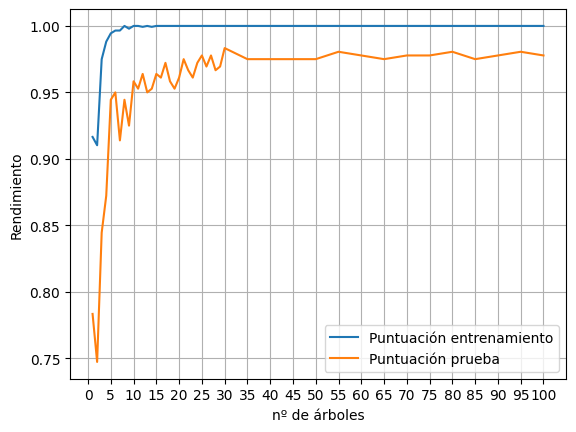

In [102]:
dibuja_arboles(X_train,X_test,y_train,y_test)

Como podemos observar la puntuación en el conjunto de entrenamiento se estabiliza en torno al 100% sobre los 10 árboles, pero lo que nos interesa es el rendimiento sobre el conjunto de pruebas, aquí vemos que el rendimiento va variando más, siendo en torno a los 25-30 árboles donde alcanzamos un mejor punto, si bien ya con poco más de 10 árboles estamos ya alrededor de un 95% de puntuación con 30 tenemos un 97% aproximadamente, usar más o menos árboles impactará en el rendimiento, y cómo a partir de **30-40 árboles se mantiene estable**.


Sin embargo este método es rudimentario, y sólo estamos alterando un hiperparámetro, normalmente querremos probar distintas combinaciones de hiperparámetros, aprender y evaluar el modelo para cada una de ellas, y seleccionar la mejor combinacion, esto se denomina _grid search_.

* `sklearn` nos proporciona la clase `GridSearchCV` del módulo `model_selection` como implementación

* Primero debemos definir los parámetros a evaluar, podemos observar los parámetros que estamos utilizando ahora mismo con `get_params` :




In [103]:
print(rfc.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 20, 'verbose': 0, 'warm_start': False}


Como podemos ver son bastantes, vamos a centrarnos en algunos de los más importantes:

* **n_estimators:** número de árboles
* **max_features:** número máximo de características consideradas en un nodo antes de dividirlo
* **max_depth:** profundidad máxima de los árboles
* **min_samples_split:** número mínimo de ejemplos para dividir un nodo (interno)
* **min_samples_leaf** número mínimo de ejemplos en un nodo hoja

In [104]:
from sklearn.model_selection import GridSearchCV

# diccionario de parámetros, los valores dados a cada clave (parametro) son de ejemplo
# para que GridSearchCV encuentre los mejores, probará todas las combinaciones posibles.
params = {
    "n_estimators": [20, 30, 40],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2"]
}

# creamos el objeto y le hacemos fit para ajustarlo a nuestro clasificador
# con cv indicamos los k-folds para la validación cruzada.
grid_search = GridSearchCV(rfc, param_grid=params, cv=5)
grid_search.fit(X_digitos, y_digitos)

# Imprimimos los mejores parámetros y el puntaje de la mejor combinación
print("Mejores parámetros:", grid_search.best_params_)
print("\nMejor puntaje:", grid_search.best_score_)

Mejores parámetros: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 40}

Mejor puntaje: 0.9337883008356547


Con esto hemos utilizado `GridSearchCV` para encontrar la mejor combinación de parámetros, evaluando con el método de la validación cruzada

Con la siguiente función `muestra_predicciones(digito,nfilas,ncols)` mostramos ejemplos del dígito que le introduzcamos y nos devolverá una serie de ejemplos, y cómo los ha catalogado el clasificador RandomForest, introduciendo el 3 vemos que hay varios mal clasificados, mientras que con el 0 es difícil encontrar alguno.

* Con el parametro `clasif` puedo reutilizar el código para el clasificador `svc` luego.


In [105]:
import numpy as np
import math

def muestra_predicciones(digito,clasif):

    # Calculamos las prediciones del modelo para cada ejemplo
    predicciones = clasif.predict(X_test)

    # Obtenemos los índices donde la prediccion da el dígito que queremos, 
    # como es un array de numpy es fácilhacerlo con np.where()
    indices = np.where(predicciones==digito)

    # Ahora que tenemos los índices, obtenemos los subarrays de X_test e y_test
    # que tienen sólo esos ejemplos
    clasificados = X_test[indices]
    valor_real = y_test[indices]

    # Array con las predicciones del clasificador de dichos ejemplos
    predicciones_digito = clasif.predict(clasificados)

    # Dibujamos, se dibujarán tantos ejemplos como haya clasificados, para ello repetimos la grid
    # que hemos utilizado antes con algunos retoques
    # Calcular el número de ejemplos es tan sencillo como hacer len() del array de predicciones
    num_ejemplos = len(clasificados)

    # Para calcular las imagenes que mostramos por fila hacemos la raiz cuadrada del número de ejemplos
    # Para las columnas utilizamos math.ceil, que devuelve el menor entero mayor que el número indicado
    # en este caso ese número es los ejemplos/las filas, es bastante intuitivo una vez hemos obtenido 
    # el nº de filas
    nfilas = int(math.sqrt(num_ejemplos))
    ncols = math.ceil(num_ejemplos/nfilas)

    fig,axes = plt.subplots(nrows=nfilas,ncols=ncols,figsize=(10, 5))
    for i,ax in enumerate(axes.flat):

        # mientras podamos mostrar ejemplos los mostramos
        if i < num_ejemplos: 

            # Utilizamos reshape para dar forma a la matriz de la imagen
            ax.imshow(clasificados[i].reshape(8,8),cmap=plt.cm.gray_r)

            # Aquí para cada imagen le colocamos su valor de clasificación, y su valor real
            # obtenidos de los arrays de arriba
            ax.set_title("Clasif {0}, Val {1}".format(predicciones_digito[i],valor_real[i]))
        else : 

            # Como no siempre podremos rellenar la última fila hacemos que los vacíos no aparezcan
            # con set_visible(False), es púramente estético
            ax.set_visible(False)

        ax.set_xticks([])
        ax.set_yticks([])
    # título general para toda la grid
    fig.suptitle("Dígitos clasificados como "+str(digito), fontsize=20, fontweight="bold")
    plt.tight_layout()
    plt.show()

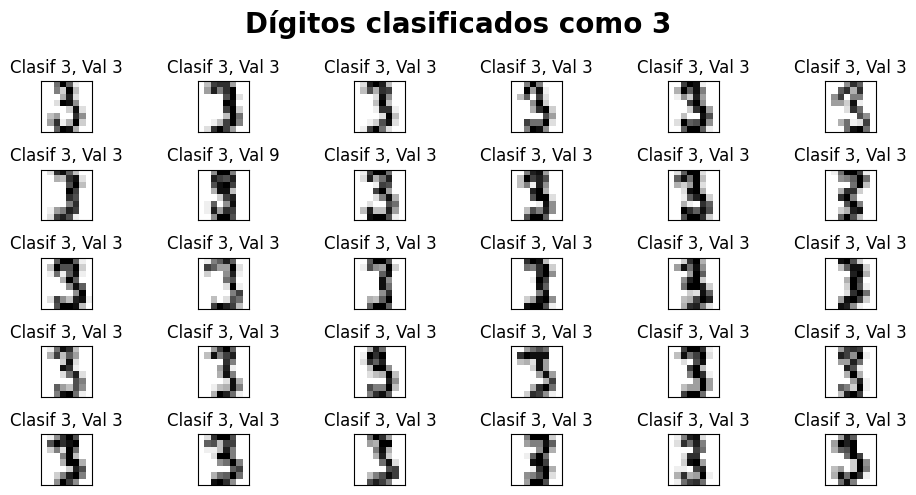

In [106]:
muestra_predicciones(3,clasif=rfc) 

Es una representacion muy completa, pero como a veces puede hacerse un poco tedioso la siguiente muestra un ejemplo bien clasificado y otro mal clasificado para el dígito indicado: 

* En principio cómo hemos utilizado `random_state` no habría que cambiar nada, pero si al ejecutar el código no muestra un ejemplo mal clasificado se puede cambiar el dígito que se introduce como parámetro hasta que se de el caso.

In [107]:
def muestra_un_digito(digito,clasif):

    # Calculamos las prediciones del modelo para cada ejemplo
    predicciones = clasif.predict(X_test)

    # Obtenemos los índices donde la prediccion da el dígito que queremos, 
    # como es un array de numpy es fácilhacerlo con np.where()

    # Ahora que tenemos los índices, obtenemos los subarrays de X_test e y_test
    # que tienen sólo esos ejemplos

    # Utilizamos np.where para encontrar un dígito bien clasificado, tomamos su índice
    # extraemos su valor real, y valor de clasificacion (que deben coincidir)
    # tambien obtenemos el ejemplo para mostrarlo más adelante
    indice_correctos = np.where((predicciones==digito) & (y_test == digito))
    clasificado_correcto = X_test[indice_correctos][0]
    valor_real_correcto = y_test[indice_correctos][0]
    valor_clasif_correcto = predicciones[indice_correctos][0]

    try:

        # Como no siempre hay ejemplos mal clasificados, con try/except hacemos que mientras no
        # de IndexError (que no encuentre un indice de alguno mal clasificado) repita el proceso de
        # arriba, sólo que buscando un dígito incorrecto, es decir prediccion =/= valor real, eso lo 
        # hacemos con np.where() otra vez
        indice_incorrectos = np.where((predicciones != digito) & (y_test == digito))
        clasificado_incorrecto = X_test[indice_incorrectos][0]
        valor_real_incorrecto = y_test[indice_incorrectos][0]
        valor_clasif_incorrecto = predicciones[indice_incorrectos][0]   

        # Para poder iterarlos más cómodamente
        clasificados = [clasificado_incorrecto, clasificado_correcto]
        valor_real = [valor_real_incorrecto, valor_real_correcto]
        valor_clasif = [valor_clasif_incorrecto,valor_clasif_correcto]

        # esta vez la grid es si o si de dos imagenes
        fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10, 5))

        # mismo proceso para iterar que anteriormente
        for i, ax in enumerate(axes.flat):
            ax.imshow(clasificados[i].reshape(8,8),cmap=plt.cm.gray_r)
            ax.set_title("Clasificado: {0}, Valor Real : {1}".format(valor_clasif[i],valor_real[i]))
        
            ax.set_xticks([])
            ax.set_yticks([])

        fig.suptitle("Ejemplo para la clase "+str(digito), fontsize=20, fontweight="bold")
        plt.show()
    
    except IndexError:

        # para el caso de que no exista ejemplo mal clasificado, uso directamente plt por que sólo muestro una imagen
        print("No hay ejemplos mal clasificados para la clase dada.\nMostrando sólo un Ejemplo bien clasificado")
        plt.imshow(clasificado_correcto.reshape(8,8),cmap=plt.cm.gray_r)
        plt.title("Clasificado: {0}, Valor Real : {1}".format(valor_clasif_correcto,valor_real_correcto))

        # esta opción es más elegante que hacerlo set_yticks([]) y set_xticks([]), pero cuando lo uso iterando como
        # arriba sólo se aplica al último
        plt.axis("off")



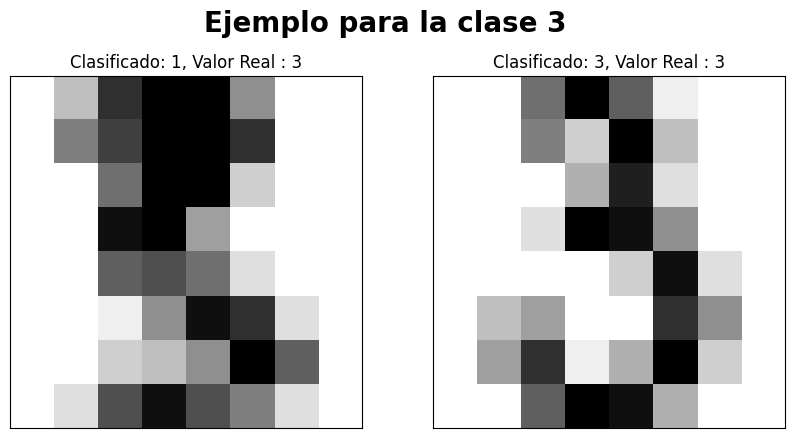

In [108]:
muestra_un_digito(3,clasif=rfc)

## Métricas de evaluación del modelo
 
Una vez hemos aprendido el modelo y observado su funcionamiento, y cómo clasifica ejemplos, tanto correctamente como incorrectamente, podemos evaluar su calidad con una serie de métricas vistas en clase, podemos empezar observando la matriz de confusión.

* Importamos `confusion_matrix` de `sklearn.metrics` y obtenemos la de nuestro clasificador:

In [109]:
from sklearn.metrics import confusion_matrix

predicciones = rfc.predict(X_test)

# obtenemos la matriz de confusión
cm = confusion_matrix(y_test,predicciones)
print(cm)

[[33  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  1  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  1  0  0]
 [ 0  0  0  0  0 45  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 31  0  0]
 [ 0  2  0  0  0  0  0  0 39  1]
 [ 0  0  0  1  0  0  0  0  0 29]]


Pese a haber utilizado `random_state` es posible que la matriz cambie cada vez que entrenemos el clasificador, aquí está el resultado que yo he obtenido: 

                                [[40  0  0  0  0  0  0  0  0  0]
                                 [ 0 40  0  0  0  0  0  0  1  0]
                                 [ 0  0 34  0  0  0  0  0  0  0]
                                 [ 0  1  0 34  0  0  0  0  0  0]
                                 [ 0  0  0  0 31  0  1  1  0  1]
                                 [ 0  0  0  0  0 33  0  0  1  0]
                                 [ 1  0  0  0  0  0 33  0  0  0]
                                 [ 0  0  0  0  0  0  0 37  0  1]
                                 [ 0  1  1  1  1  0  0  1 30  0]
                                 [ 0  0  0  1  0  0  0  1  0 33]]

Las filas de la matriz representan los valores reales de los ejemplos, y las columnas las predicciones del clasificador

* Por ejemplo, para la clase 0 ha clasificado 40 ejemplos como clase 0, de los 4 que son realmente de clase 0, si bien ha clasificado incorrectamente un clase 6 como clase 0 

* Sin embargo en la clase 1 clasificó un ejemplo de clase 3 y otro de clase 8 incorrectamente como clase 1.

* Otro caso es la clase 8, varios ejemplos de esta clase han sido clasificados incorrectamente en distintas clases

Por ahora hemos estado utilizando sólo la tasa de aciertos como medida del rendimiento, como hemos estudiado, esto no es lo más apropiado en la mayoría de los casos, siendo necesario utilizar otras medidas:

* **Accuracy:** Proporción de aciertos del modelo, es la que hemos estado utilizando anteriormente
* **Precision:** proporción de los verdaderos positivos de entre los que el modelo ha predecido como positivos
* **Recall:** verdaderos positivos detectados entre los positivos reales
* **F1:** media armónica entre precision y recall, es muy utilizada al combinar ambas

`sklearn` tiene estas medidas implementadas, sólo tenemos que importar `classification_report` del módulo `metrics`, como parámetros pasaremos los valores reales de cada ejemplo del dataset, y las predicciones que ha hecho nuestro modelo.

In [110]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.92      1.00      0.96        36
           2       1.00      1.00      1.00        44
           3       0.97      0.97      0.97        30
           4       0.97      0.97      0.97        34
           5       1.00      1.00      1.00        45
           6       1.00      1.00      1.00        34
           7       0.97      1.00      0.98        31
           8       1.00      0.93      0.96        42
           9       0.97      0.97      0.97        30

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



Aquí mis resultados: 

                                    precision    recall  f1-score   support

                                0       0.98      1.00      0.99        40
                                1       0.95      0.98      0.96        41
                                2       0.97      1.00      0.99        34
                                3       0.94      0.97      0.96        35
                                4       0.97      0.91      0.94        34
                                5       1.00      0.97      0.99        34
                                6       0.97      0.97      0.97        34
                                7       0.93      0.97      0.95        38
                                8       0.94      0.86      0.90        35
                                9       0.94      0.94      0.94        35

                         accuracy                           0.96       360
                        macro avg       0.96      0.96      0.96       360
                     weighted avg       0.96      0.96      0.96       360

En estos resultados de `classification_report` podemos notar que ha calculado cada métrica para cada clase posible, y finalmente tenemos al final la tasa de aciertos del modelo, que es de en torno al 96%

* la columna `support` (soporte) indica el total de ejemplos verdaderos de cada clase del conjunto de datos.

* `macro avg` es la media aritmética de la métrica de la columna, `weighted avg` es la media ponderada, por tanto la primera da la misma importancia a cada clase mientras que la última las pondera en funciñon de su tamaño/distribución.

* las medidas resultantes son bastante altas, lo que indica que el modelo distingue bien cada clase, sin embargo, al fijarnos en las filas de cada clase descubriremos algunas en las que ha tenido más éxito que en otras, como vimos antes, muy seguramente, dígitos como el 0 no los confundirá a menudo mientras que con otros como el 8 será algo más común que se equivoque, observando la matriz de confusión o los resultados de `classification_report` localizamos rápidamente estos casos. Algunos de los valores que salen un poco de la norma y destacamos son estos:

    * Para la clase 7 tenemos una ***precision*** de 0.93, lo que indica que algunos ejemplos se han clasificados incorrectamente como clase 7

    * Para la clase 8 tenemos un ***recall*** de 0.86, por tanto un número anormalmente bajo, comparado con la media tanto aritmética como ponderada de 0.96, quiere decir que el clasificador ha idenificado correctamente como clase 8 al 86% de ejemplos totales de esa clase

    * En ambos casos estos datos anormales se han visto reflejados en **una medida F1 menor que la media**, que indica que el modelo es ligeramente peor clasificando esas clases

Observando la matriz de confusión una vez más podemos considerar los dígitos que han sido confundidos para construir un clasificador binario capaz de distinguir entre 2 dígitos concretos:

In [111]:
from sklearn.svm import SVC

def clasif_binario(digito1,digito2,clasif):
    
    # Con np.logical_or() escogemos los de una condicion y otra, para quedarnos solo con los 2 digitos que queremos
    X = X_digitos[np.logical_or(y_digitos==digito1, y_digitos==digito2)]
    y = y_digitos[np.logical_or(y_digitos==digito1, y_digitos==digito2)]

    # lo demás es igual a como lo hicimos anteriormente
    X_train_bin,X_test_bin, y_train_bin, y_test_bin = train_test_split(X,y,test_size=0.2)

    # con esto podemos utilizarlo tanto para RandomForest como para SVC
    if(clasif == RandomForestClassifier):
        c_bin = RandomForestClassifier(n_estimators=30)
        c_bin.fit(X_train_bin,y_train_bin)
    else:
        c_bin = SVC()
        c_bin.fit(X_train_bin,y_train_bin)
    predicciones_bin = c_bin.predict(X_test_bin)

    cm = confusion_matrix(y_test_bin,predicciones_bin)


    print("--- Puntuación sobre cjto de entrenamiento: {0}".format(round(float(clasif.score(X_train,y_train))*100,3)),"%\n")
    print("--- Puntuación sobre cjto de prueba: {0}".format(round(float(clasif.score(X_test,y_test))*100,3)),"%\n")

    print("--- Matriz de confusión del clasificador binario para los dígitos {0} y {1}\n\n".format(digito1,digito2),cm)

    print("\n--- Informe de clasificación del clasificador RandomForest binario\n\n",classification_report(y_test_bin, predicciones_bin))
    

In [112]:
clasif_binario(8,4,clasif=rfc)

--- Puntuación sobre cjto de entrenamiento: 100.0 %

--- Puntuación sobre cjto de prueba: 98.056 %

--- Matriz de confusión del clasificador binario para los dígitos 8 y 4

 [[39  1]
 [ 0 31]]

--- Informe de clasificación del clasificador RandomForest binario

               precision    recall  f1-score   support

           4       1.00      0.97      0.99        40
           8       0.97      1.00      0.98        31

    accuracy                           0.99        71
   macro avg       0.98      0.99      0.99        71
weighted avg       0.99      0.99      0.99        71



Aquí están los resultados que he obtenido con las clases 8 y 4: 

                           precision    recall  f1-score   support

                        4       1.00      1.00      1.00        34
                        8       1.00      1.00      1.00        37

                caccuracy                           1.00        71
                macro avg       1.00      1.00      1.00        71
             weighted avg       1.00      1.00      1.00        71

Para este caso notamos que el dígito 8, que antes le costaba un poco más de lo normal clasificar bien ha tenido resultados perfectos al compararlo con el 4, podemos llamar a la función con par de dígitos para ver como da resultado, pero en general se equivoca muy poco.



---


### Clasificador SVC

Ahora probaremos a utilizar máquinas de vectores soporte (SVM) para la clasificación, y compararemos su rendimiento con el RandomForest

* Para utilizarlo, importamos `SVC`  de `sklearn.svm`

In [113]:
from sklearn.svm import SVC

# lo primero es crear el objeto scv, como siempre, y hacer fit (ajustarlo a nuestros datos)
svc = SVC()
svc.fit(X_train,y_train)


SVC()

* Vamos a mostrar algunos resultados : 

In [114]:
imprime_predicciones(X_train,X_test,y_train,y_test,clasif=svc)

Predicciones del modelo: [0 3 9 9 4 3 3 2 2] 
Resultados esperados: [0 3 9 9 4 3 3 2 2]

Puntuación sobre cjto de entrenamiento: 99.582 %

Puntuación sobre cjto de prueba: 99.444 %



Obtenemos un buen rendimiento, en mi caso tenemos una puntuación del 95% en el conjunto de prueba, vamos a probar a evaluarlo con validacion cruzada: 

In [115]:
scores = cross_val_score(svc,X_digitos,y_digitos,cv=5)

print("Puntuaciones obtenidas en cada pliegue(fold): ",scores)
print("Puntuación media obtenida: ", scores.mean())

Puntuaciones obtenidas en cada pliegue(fold):  [0.96111111 0.94444444 0.98328691 0.98885794 0.93871866]
Puntuación media obtenida:  0.9632838130609718


Ahora vamos a intentar optimizarlos hiperparámetros con `GridSearchCV`, para ello primero tenemos que entenderlos: 

In [116]:
print(svc.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


Una vez más, son bastantes, nos vamos a limitar a algunos de los más importantes: 
* `Kernel` : Como sabemos, el kernel permite aprender una frontera de decision no lineal, es uno de los parámetros más importantes

* `C` : la regularización del modelo, esto controla lo complejo que se vuelve el modelo penalizandolo a más complejo se vuelve, cuanto lo penaliza, es lo que controlamos con este parámetro

* `gamma`: controla la frontera de decisión, un valor bajo proporciona una frontera suave, y uno más algo una frontera más ajustada.

In [117]:
# diccionario de parámetros, los valores dados a cada clave (parametro) son de ejemplo
# para que GridSearchCV encuentre los mejores, probará todas las combinaciones posibles.
params_svc = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],
    'kernel': ['poly','linear','rbf', 'sigmoid']
}

# creamos el objeto y le hacemos fit para ajustarlo a nuestro clasificador
# con cv indicamos los k-folds para la validación cruzada.
grid_search = GridSearchCV(svc, param_grid=params_svc, cv=5)
grid_search.fit(X_digitos, y_digitos)

# Imprimimos los mejores parámetros y el puntaje de la mejor combinación
print("Mejores parámetros:", grid_search.best_params_)
print("\nMejor puntaje:", grid_search.best_score_)

Mejores parámetros: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}

Mejor puntaje: 0.96884246363355


Podemos reutilizar las funciones anteriores, y mostrar ejemplos bien y mal clasificados para el clasificador `svc`

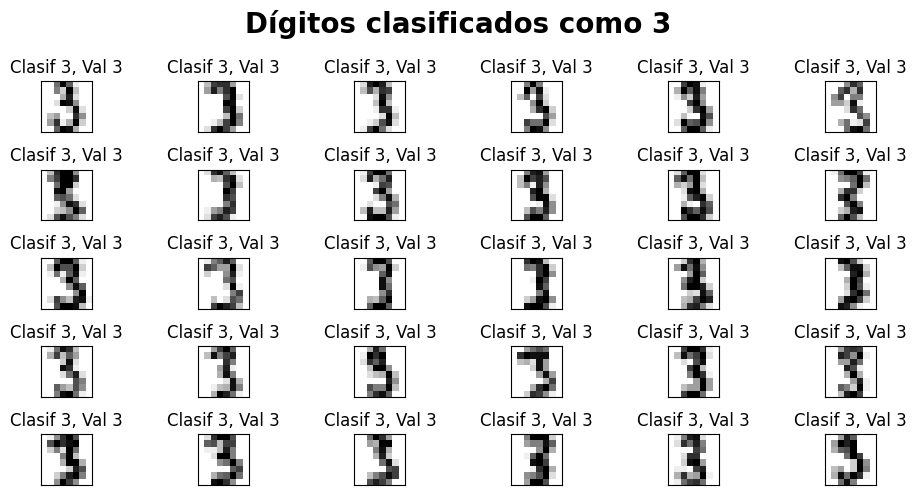

In [118]:
muestra_predicciones(3,clasif=svc) 

No hay ejemplos mal clasificados para la clase dada.
Mostrando sólo un Ejemplo bien clasificado


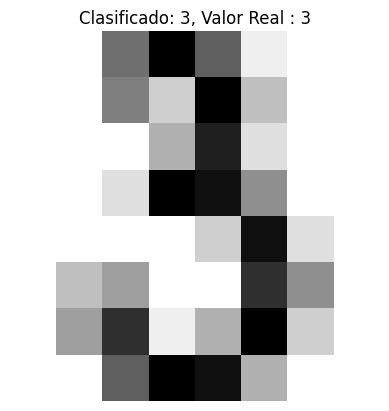

In [119]:
muestra_un_digito(3,clasif=svc)

### Metricas

vamos a comprobar la matriz de confusión, y las métricas: 

In [120]:
cm = confusion_matrix(y_test,svc.predict(X_test))
print(cm)

[[34  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0]
 [ 0  0  0  0 34  0  0  0  0  0]
 [ 0  0  0  0  0 45  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 31  0  0]
 [ 0  0  0  0  0  0  0  0 41  1]
 [ 0  0  0  0  0  0  0  0  1 29]]


In [121]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        34
           5       1.00      1.00      1.00        45
           6       1.00      1.00      1.00        34
           7       1.00      1.00      1.00        31
           8       0.98      0.98      0.98        42
           9       0.97      0.97      0.97        30

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



En mi caso: 

        [[28  0  0  0  0  0  0  0  0  0]
         [ 0 42  0  0  0  0  0  0  0  0]
         [ 0  0 31  0  0  0  0  0  0  0]
         [ 0  0  1 34  0  0  0  0  0  0]
         [ 0  0  0  0 35  0  0  0  0  2]
         [ 0  0  0  0  0 37  0  0  0  1]
         [ 0  0  0  0  0  0 31  0  1  0]
         [ 0  0  0  0  0  0  0 37  0  0]
         [ 0  3  0  0  0  0  0  0 33  0]
         [ 0  0  0  0  0  0  0  0  0 44]]


                  precision    recall  f1-score   support

               0       1.00      1.00      1.00        28
               1       0.93      1.00      0.97        42
               2       0.97      1.00      0.98        31
               3       1.00      0.97      0.99        35
               4       1.00      0.95      0.97        37
               5       1.00      0.97      0.99        38
               6       1.00      0.97      0.98        32
               7       1.00      1.00      1.00        37
               8       0.97      0.92      0.94        36
               9       0.94      1.00      0.97        44

        accuracy                           0.98       360
       macro avg       0.98      0.98      0.98       360
    weighted avg       0.98      0.98      0.98       360




Las métricas son similares a las obtenidas con el clasificador RandomForest, si bien parece que tiende más a equivocarse en clases concretas (por ejemplo, 3 de clase 8 clasificados como clase 2)

Vamos a comprobar un clasificador binario para esos dos dígitos: 

In [122]:
clasif_binario(8,4,clasif=svc)

--- Puntuación sobre cjto de entrenamiento: 99.582 %

--- Puntuación sobre cjto de prueba: 99.444 %

--- Matriz de confusión del clasificador binario para los dígitos 8 y 4

 [[38  0]
 [ 0 33]]

--- Informe de clasificación del clasificador RandomForest binario

               precision    recall  f1-score   support

           4       1.00      1.00      1.00        38
           8       1.00      1.00      1.00        33

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71



Ahora suele equivocarse poco o nada, más o menos como con el caso del Random Forest.

---

## 3. Conjunto de Datos Adicional: SMS spam collection

Como segundo conjunto de datos he seleccionado del repositorio UCI el dataset de [Spam en mensajes SMS](https://archive-beta.ics.uci.edu/dataset/228/sms+spam+collection), en el dataset cada línea indica un mensaje sms, y si es spam o no.



### Exploracion preliminar

Lo primero que haremos será analizar un poco el Dataset, como hemos hecho antes con el de dígitos manuscritos:

* **Dos Clases**, spam o ham, es decir, si es spam o no, por tanto podemos definirlo como un problema de clasificacion binaria

* Hay muchos más mensajes no spam que spam en el dataset, por lo que **está desbalanceado** algo que deberemos tener en cuenta a la hora de entrenar el modelo.

* Entrenaremos al modelo para discernir si un mensaje sms es spam o no

In [123]:
import pandas as pd


# Cargamos el dataset en un dataframe de pandas, y le damos nombre a las columnas (el valor de clasificacion real, y el mensaje)
df = pd.read_table("SMSSpamCollection",names=["clase","texto"], header=None, encoding='utf-8')

print("--- Numero de filas y Columnas del conjunto de datos: \n\n",df.shape)

# con la clave "clase" obtenemos solo los valores de esa columna, y value_counts() devuelve los valores
# unicos que haya en la columna, es decir, los valores de clasificacion reales de cada ejemplo
print("\n--- Posibles valores de clasificación, y cuántos hay en el dataset:\n\n",df["clase"].value_counts())
print("\n--- Algunos ejemplos del dataset:\n\n",df.head())

# con iloc podemos acceder al datafram utilizando indices de fila y columna, luego podemos escoger lo que queramos
# utilizando su clave
print("\n--- Un ejemplo Concreto:\n\n {0}\n{1}".format(df.iloc[0]["clase"], df.iloc[0]["texto"]))

--- Numero de filas y Columnas del conjunto de datos: 

 (5572, 2)

--- Posibles valores de clasificación, y cuántos hay en el dataset:

 ham     4825
spam     747
Name: clase, dtype: int64

--- Algunos ejemplos del dataset:

   clase                                              texto
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

--- Un ejemplo Concreto:

 ham
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


Para trabajar con el conjunto de datos en `Scikit-Learn` crearemos variables con la columna de textos, es decir, las caracteristicas de los mensajes, y en otra guardaremos los valores de clasificacion reales.

* Una vez hecho esto podemos dividir el conjunto de datos en entrenamiento y prueba con `train_test_split()`, por ejemplo, aunque para un conjunto de datos desbalanceado como este, en principio **sería mejor emplear validación cruzada**, lo haremos de las dos formas y compararemos lo obtenido.

In [124]:
X_spam = df["texto"]
y_spam = df["clase"]

# dejamos un 20% del conjunto de datos para prueba, con random_state aseguramos que se puedan
# reproducir los resultados
X_train_spam, X_test_spam, y_train_spam, y_test_spam = train_test_split(X_spam,y_spam,test_size=0.2, random_state=30)

### Vectorizadores

No podemos trabajar directamente sobre textos, para poder utilizar los clasificadores de `Scikit-Learn` debemos representar estos como vectores numéricos, una de las formas más fáciles de hacerlo es representar la frecuencia de términos una vez fijado el vocabulario, podemos hacerlo con `CountVectorizer`

* `CountVectorizer` puede usarse en modo binario (si un termino aparece o no) o contando ocurrencias de palabras, que es el que emplearemos ahora.

In [125]:
from sklearn.feature_extraction.text import CountVectorizer

# Creamos el objeto vectorizador y lo ajustamos con fit al corpus de nuestros mensajes
vect = CountVectorizer()
vect.fit(X_train_spam)

CountVectorizer()

* Podemos mostrar algunos datos del vocabulario:

In [126]:
print("Tamaño del vocabulario: {0}".format(len(vect.vocabulary_)))

# El vocabulario es un diccionario tipo {palabra:apariciones} podemos mostrarlo entero pero es muy grande, por eso con items()
# obtenemos una lista de tuplas con las claves y los valores, escojo los 10 primeros.
print("Algunos ejemplos del vocabulario:\n {0}".format(list(vect.vocabulary_.items())[:9]))

Tamaño del vocabulario: 7827
Algunos ejemplos del vocabulario:
 [('today', 7001), ('is', 3800), ('sorry', 6398), ('day', 2214), ('if', 3653), ('ever', 2706), ('was', 7465), ('angry', 994), ('with', 7625)]


* Tenemos que convertir nuestros conjuntos de entrenamiento y prueba en las matrices de frecuencia de términos, que es realmente con lo que trabajará el clasificador, para ello empleamos `transform`

In [127]:
# Ahora tenemos que transformar nuestros conjuntos de entrenamiento y prueba 
# en dichas matrices de frecuencia de términos
X_train_spam_vect = vect.transform(X_train_spam)
X_test_spam_vect = vect.transform(X_test_spam)

Ahora podemos utilizar el clasificador `RandomForestClassifier`, o cualquier otro, podríamos utilizar el que ya creamos arriba para el conjunto de datos de digitos manuscritos, pero evidentemente tendremos que hacer **fit()** con los nuevos datos antes de utilizarlo.

In [128]:
rfc = RandomForestClassifier(n_estimators=100,random_state=20)
rfc.fit(X_train_spam_vect,y_train_spam)

RandomForestClassifier(random_state=20)

* mostramos sus resultados con la función que habíamos creado arriba para el anterior dataset: 

In [129]:
imprime_predicciones(X_train_spam_vect,X_test_spam_vect,y_train_spam,y_test_spam,clasif=rfc)

Predicciones del modelo: ['ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham'] 
Resultados esperados: ['ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham']

Puntuación sobre cjto de entrenamiento: 100.0 %

Puntuación sobre cjto de prueba: 97.399 %



* Como podemos observar obtenemos muy buenos resultados para el conjunto de prueba de entre un 95-97% usualmente, podemos hacer un análisis similar del rendimiento según el número de árboles como hicimos con el anterior dataset:

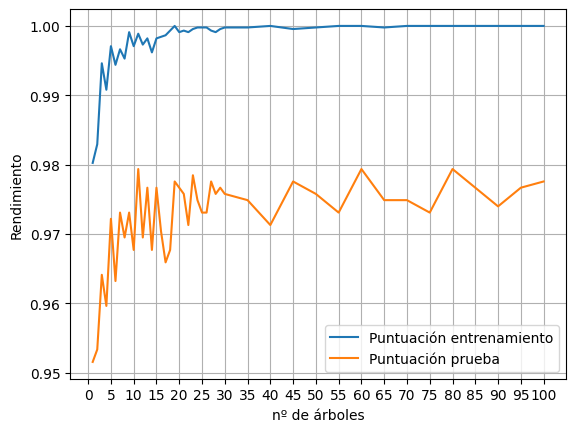

In [130]:
dibuja_arboles(X_train_spam_vect,X_test_spam_vect,y_train_spam,y_test_spam)

Vamos a probar a evaluar por validación cruzada.
* Ahora trabajamos con todo el conjunto de datos, tenemos que vectorizar `X_spam`:

In [131]:
X_spam_vect = vect.transform(X_spam)
scores_spam = cross_val_score(rfc,X_spam_vect,y_spam,cv=5)

print("Puntuaciones obtenidas en cada pliegue(fold): ",scores_spam)
print("Puntuación media obtenida: ", scores_spam.mean())

Puntuaciones obtenidas en cada pliegue(fold):  [0.97757848 0.9793722  0.97486535 0.96947935 0.97755835]
Puntuación media obtenida:  0.9757707449420744


Con grid search podemos hacer una búsqueda exhaustiva de los mejores hiperparámetros, como hicimos con el dataset anterior :

In [132]:
# creamos el objeto y le hacemos fit para ajustarlo a nuestro clasificador
# con cv indicamos los k-folds para la validación cruzada.
grid_search_spam = GridSearchCV(rfc, param_grid=params, cv=5)
grid_search_spam.fit(X_train_spam_vect, y_train_spam)

# Imprimimos los mejores parámetros y el puntaje de la mejor combinación
print("Mejores parámetros:", grid_search_spam.best_params_)
print("\nMejor puntaje:", grid_search_spam.best_score_)

Mejores parámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 40}

Mejor puntaje: 0.9764397839883638


Ahora vamos a ver los ejemplos en los que se ha equivocado, donde observamos algo interesante:

In [133]:
predicciones = rfc.predict(X_test_spam_vect)

#escogemos los indices de predicicones donde el valor predecido no es el valor real
ind_clasif_incorrecto = np.where(predicciones!=y_test_spam)[0]

# los mostramos por pantalla, como X_test_spam e Y_test_spam son series de pandas accedemos a ellos con iloc,
# si solo ponemos los corchetes lo interpretará como una clave.
for i in ind_clasif_incorrecto:
    print("Ejemplo mal clasificado: \n\n{0}\n\nValor real: {1}\nPrediccion: {2}".format(
        X_test_spam.iloc[i],y_test_spam.iloc[i],predicciones[i]))
    

Ejemplo mal clasificado: 

Dorothy@kiefer.com (Bank of Granite issues Strong-Buy) EXPLOSIVE PICK FOR OUR MEMBERS *****UP OVER 300% *********** Nasdaq Symbol CDGT That is a $5.00 per..

Valor real: spam
Prediccion: ham
Ejemplo mal clasificado: 

LookAtMe!: Thanks for your purchase of a video clip from LookAtMe!, you've been charged 35p. Think you can do better? Why not send a video in a MMSto 32323.

Valor real: spam
Prediccion: ham
Ejemplo mal clasificado: 

Free Msg: get Gnarls Barkleys "Crazy" ringtone TOTALLY FREE just reply GO to this message right now!

Valor real: spam
Prediccion: ham
Ejemplo mal clasificado: 

Twinks, bears, scallies, skins and jocks are calling now. Don't miss the weekend's fun. Call 08712466669 at 10p/min. 2 stop texts call 08712460324(nat rate)

Valor real: spam
Prediccion: ham
Ejemplo mal clasificado: 

TheMob>Yo yo yo-Here comes a new selection of hot downloads for our members to get for FREE! Just click & open the next link sent to ur fone...

Valor real: 

* también es posible hacer predicciones sobre textos concretos, por ejemplo:

In [134]:
mensaje = vect.transform(["Congrats!, You just won the lottery, please claim your prize here!"])

prediccion = rfc.predict(mensaje)
print(prediccion)

['spam']


Curiosamente, la inmensa mayoría de las veces (si no todas) que se equivoca, es cuando dice que algo que es spam no lo es, vamos a observar la matriz de confusión : 

In [135]:
cm = confusion_matrix(y_test_spam, rfc.predict(X_test_spam_vect))
print(cm)

[[979   0]
 [ 29 107]]


Con una matriz como esta para mi caso: 

        [[979   0]
         [ 29 107]]

Nuestras sospechas se confirman, muy probablemente esto se debe a que el conjunto de datos está desbalanceado, observemos las métricas

In [136]:
print(classification_report(y_test_spam, rfc.predict(X_test_spam_vect)))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       979
        spam       1.00      0.79      0.88       136

    accuracy                           0.97      1115
   macro avg       0.99      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



Para mi caso: 

                              precision    recall  f1-score   support

                         ham       0.97      1.00      0.99       979
                        spam       1.00      0.79      0.88       136

                    accuracy                           0.97      1115
                   macro avg       0.99      0.89      0.93      1115
                weighted avg       0.97      0.97      0.97      1115

Tenemos un recall de 0,79 para la clase spam, lo que quiere decir que sólo un 79% de los mensajes de spam fueron clasificados como tal, esto es seguramente, consecuencia de estar trabajando con un conjunto de datos desbalanceado.


Bien, ahora podemos probar a vectorizar, pero incluyendo las `stop_words` del inglés incluidas con `sklearn`


In [137]:
vect = CountVectorizer(stop_words="english")


vect.fit(X_train_spam)

CountVectorizer(stop_words='english')

* Entrenamos el modelo de nuevo:

In [138]:
X_train_spam_vect = vect.transform(X_train_spam)
X_test_spam_vect = vect.transform(X_test_spam)

rfc = RandomForestClassifier(n_estimators=100,random_state=20)
rfc.fit(X_train_spam_vect,y_train_spam)

RandomForestClassifier(random_state=20)

* Vamos a ir directamente a observar la matriz de confusión:

In [139]:
cm = confusion_matrix(y_test_spam, rfc.predict(X_test_spam_vect))
print(cm)
print(classification_report(y_test_spam, rfc.predict(X_test_spam_vect)))

[[979   0]
 [ 26 110]]
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       979
        spam       1.00      0.81      0.89       136

    accuracy                           0.98      1115
   macro avg       0.99      0.90      0.94      1115
weighted avg       0.98      0.98      0.98      1115



En mi caso : 

        [[979   0]
         [ 26 110]]


                      precision    recall  f1-score   support

                 ham       0.97      1.00      0.99       979
                spam       1.00      0.81      0.89       136

            accuracy                           0.98      1115
           macro avg       0.99      0.90      0.94      1115
        weighted avg       0.98      0.98      0.98      1115

Generalmente, con un recall de 0,81,  parece que mejora un poco su detección de correos spam, sin alterar su eficacia en lo demás.

Sin embargo aun no hemos acabado, vamos ver como mejora el rendimiento al aplicar el parametro `min_df`

* vamos a ponerlo en 5, es decir, que una palabra deberá aparecer en por lo menos 5 sms para pertenecer al vocabulario

In [140]:
vect = CountVectorizer(stop_words="english", min_df=5)

vect.fit(X_train_spam)

CountVectorizer(min_df=5, stop_words='english')

* Vectorizamos de nuevo, y entrenamos el modelo: 

In [141]:
X_train_spam_vect = vect.transform(X_train_spam)
X_test_spam_vect = vect.transform(X_test_spam)

rfc = RandomForestClassifier(n_estimators=100,random_state=20)
rfc.fit(X_train_spam_vect,y_train_spam)

RandomForestClassifier(random_state=20)

* Mostramos el rendimiento :

In [142]:
cm = confusion_matrix(y_test_spam, rfc.predict(X_test_spam_vect))
print(cm)
print(classification_report(y_test_spam, rfc.predict(X_test_spam_vect)))

[[973   6]
 [ 15 121]]
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       979
        spam       0.95      0.89      0.92       136

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115



Ha pasado algo interesante, aunque ha empezado a acertar más en clasificar correos spam como tales, ahora también ha empezado a equivocarse al clasificar correos normales como spam.

* Según el contexto puede ser peor o mejor, si bien menos correos spam escapan a su filtro, es bastante probable que no sea viable permitir que correos normales, que pueden ser importantes, se clasifiquen como spam.

Vamos a probar a hacer la clasificación con un `SVC`: 

In [143]:
svc.fit(X_train_spam_vect,y_train_spam)

cm = confusion_matrix(y_test_spam,svc.predict(X_test_spam_vect))
print(cm)
print(classification_report(y_test_spam, svc.predict(X_test_spam_vect)))

[[977   2]
 [ 21 115]]
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       979
        spam       0.98      0.85      0.91       136

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



El clasificador SVC da un rendimiento parecido, pero con alguna diferencia, clasifica menos correos no spam como spam, pero se equivoca más al clasificar correos spam como tal.

Podemos probar también el rendimiento con `CountVectorizer` binario :

In [144]:
# Creamos el objeto vectorizador y lo ajustamos con fit al corpus de nuestros mensajes
vect = CountVectorizer(binary=True,stop_words="english", min_df=5)
vect.fit(X_train_spam)

# Ahora tenemos que transformar nuestros conjuntos de entrenamiento y prueba 
# en dichas matrices de frecuencia de términos
X_train_spam_bin = vect.transform(X_train_spam)
X_test_spam_bin = vect.transform(X_test_spam)

* entrenamos el Clasificador para el nuevo conjunto de datos vectorizado:

In [145]:
rfc.fit(X_train_spam_bin,y_train_spam)

RandomForestClassifier(random_state=20)

* mostramos sus resultados: 

In [146]:
imprime_predicciones(X_train_spam_bin,X_test_spam_bin,y_train_spam,y_test_spam, clasif=rfc)

Predicciones del modelo: ['ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham'] 
Resultados esperados: ['ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham']

Puntuación sobre cjto de entrenamiento: 99.933 %

Puntuación sobre cjto de prueba: 98.296 %



* Probamos a evaluar con validacion cruzada: 

In [147]:
scores_bin = cross_val_score(rfc,X_test_spam_bin,y_test_spam,cv=5)

print("Puntuaciones obtenidas en cada pliegue(fold): ",scores_bin)
print("Puntuación media obtenida: ", scores.mean())

Puntuaciones obtenidas en cada pliegue(fold):  [0.96412556 0.95515695 0.97309417 0.96412556 0.92825112]
Puntuación media obtenida:  0.9632838130609718


* Y optimizando hiperparámetros con grid search:

In [148]:
# creamos el objeto y le hacemos fit para ajustarlo a nuestro clasificador
# con cv indicamos los k-folds para la validación cruzada.
grid_search_spam = GridSearchCV(rfc, param_grid=params, cv=5)
grid_search_spam.fit(X_train_spam_bin, y_train_spam)

# Imprimimos los mejores parámetros y el puntaje de la mejor combinación
print("Mejores parámetros:", grid_search_spam.best_params_)
print("\nMejor puntaje:", grid_search_spam.best_score_)

Mejores parámetros: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 40}

Mejor puntaje: 0.9795813138862466


* finalmente podemos obtener tanto su matriz de confusión como sus métricas :

In [149]:
cm = confusion_matrix(y_test_spam, rfc.predict(X_test_spam_vect))
print(cm)

[[975   4]
 [ 15 121]]


In [150]:
print(classification_report(y_test_spam, rfc.predict(X_test_spam_vect)))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       979
        spam       0.97      0.89      0.93       136

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



Podemos notar que realmente no ha cambiado gran cosa, el clasificador obtiene métricas similares y sigue teniendo los mismos problemas, se reduce el número de mensajes spam que se clasifican mal, pero empieza a equivocarse al clasificar los no spam 

Ahora veamos CountVectorizer binario con un `SVC`

In [152]:
# entrenamos el svc con los datos vectorizados
svc.fit(X_train_spam_bin,y_train_spam)

cm = confusion_matrix(y_test_spam,svc.predict(X_test_spam_bin))
print(cm)
print(classification_report(y_test_spam, svc.predict(X_test_spam_bin)))

[[979   0]
 [ 21 115]]
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       979
        spam       1.00      0.85      0.92       136

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



Al igual que antes acierta un poco peor al clasficar correos spam como tal, pero se equivoca menos clasificando mal correos no spam.

Vamos a probar a  vectorizar con Tfidf para ver si hay algun cambio sustancial en el rendimiento del clasificador:
*  importamos `TfidfVectorizer` de `Sklearn.feature_extraction.text`

In [153]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Creamos el objeto...
tfidf_vect = TfidfVectorizer(stop_words="english", min_df=5)
# ... y lo entrenamos.
tfidf_vect.fit(X_train_spam)

# vectorizamos conjuntos de entrenamiento y prueba
X_train_spam_tfidf = tfidf_vect.transform(X_train_spam)
X_test_spam_tfidf = tfidf_vect.transform(X_test_spam)

* Ajustamos el modelo a los nuevos datos vectorizados

In [154]:
rfc.fit(X_train_spam_tfidf,y_train_spam)

RandomForestClassifier(random_state=20)

* mostramos algunas predicciones: 

In [155]:
imprime_predicciones(X_train_spam_tfidf,X_test_spam_tfidf,y_train_spam,y_test_spam, clasif=rfc)

Predicciones del modelo: ['ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham'] 
Resultados esperados: ['ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham']

Puntuación sobre cjto de entrenamiento: 99.955 %

Puntuación sobre cjto de prueba: 98.206 %



* Podemos comprobar la matriz de confusión y las métricas, lo que nos confirma que no mucho ha cambiado: 

In [156]:
cm = confusion_matrix(y_test_spam, rfc.predict(X_test_spam_tfidf))
print(cm,"\n")

print(classification_report(y_test_spam, rfc.predict(X_test_spam_tfidf)))

[[976   3]
 [ 17 119]] 

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       979
        spam       0.98      0.88      0.92       136

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



Podemos hacer también la clasificación con un `SVC`:

In [157]:
svc.fit(X_train_spam_tfidf,y_train_spam)

cm = confusion_matrix(y_test_spam,svc.predict(X_test_spam_tfidf))
print(cm)
print(classification_report(y_test_spam, svc.predict(X_test_spam_tfidf)))

[[978   1]
 [ 16 120]]
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       979
        spam       0.99      0.88      0.93       136

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



Da resultados muy similares, tambien podemos utilizar las funciones anteriores, cambiando el parámetro clasif:

In [158]:
imprime_predicciones(X_train_spam_tfidf,X_test_spam_tfidf,y_train_spam,y_test_spam, clasif=svc)

Predicciones del modelo: ['ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham'] 
Resultados esperados: ['ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham']

Puntuación sobre cjto de entrenamiento: 99.619 %

Puntuación sobre cjto de prueba: 98.475 %



---
## 2. Críticas de cine en IMDB

En este apartado, los datos serán críticas de películas en la web IMDB (Internet Movie Database). Aunque ya se ha usado en una práctica de clase, lo describimos ahora brevemente. 

Son críticas que ya vienen con la etiqueta "pos" o "neg", de acuerdo a la puntuación que acompaña a la crítica (positiva, 7 o más; negativa 4 o menos). El objetivo es ser capaz de declarar como positiva o negativa una crítica (por supuesto, sin saber la puntuación que la acompaña).

Los datos están disponibles en http://ai.stanford.edu/~amaas/data/sentiment/

**Importante: Una vez descomprimido, eliminar la carpeta `train/unsup`, que no usaremos.**

**Consejo**: puesto que se crean múltiples archivos, se aconseja descomprimirlo en una carpeta que no se sincronice con la nube.  

Para cargarlo en sklearn usar la utilidad `load_files`:  

In [ ]:
from sklearn.datasets import load_files

reviews_train = load_files("data/aclImdb/train/",encoding='utf-8')
text_train, y_train = reviews_train.data, reviews_train.target

reviews_test = load_files("data/aclImdb/test/",encoding='utf-8')
text_test, y_test = reviews_test.data, reviews_test.target

Quitamos algunas marcas en HTML, para "limpiar" los textos.

In [ ]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

Para poder aplicar los clasificadores de Scikit Learn, hemos de vectorizar los textos. En scikitlearn se pueden elegir varias formas de vectorizar:

* **CountVectorizer**, modo binario (sólo se anota si un término ocurre o no)
* **CountVectorizer**, contando ocurrencias
* **TfIdfVectorizer**, vectorizando con TfIdf

El uso de estos vectorizadores se puede comprender a partir de lo visto en el tema de Procesamiento de Lenguaje Natural, y del manual de Scikit Learn. En particular **es importante el uso de los parámetros stop_words y min_df** para simplificar a vectorización. Una vez entendido y explorado su uso, elegir la mejor combinación de vectorizador y de clasificador, para este conjunto de datos. 

También mostrar la predicción que se realiza sobre algunas críticas concretas del conjunto de test. 

## 3. Un tercer conjunto de datos adicional

Este apartado es opcional, y se podría hacer en lugar de uno de los dos apartados anteriores

Se pide estudiar un tercer conjunto de datos (clasificación o regresión), obtenido a partir de algún repositorio. Por ejemplo, uno muy popular es el de UCI: https://archive.ics.uci.edu/ml/index.php

Damos un par de sugerencias, pero solo a título orientativo:

* Conjunto de datos de dermatología: https://archive.ics.uci.edu/ml/datasets/dermatology (problema de clasificación)
* Calidad de vino: https://archive.ics.uci.edu/ml/datasets/wine+quality (regresión, y por tanto habría que usar las correspondientes versiones de regresión de los modelos) 

Nótese que en este caso, esto implicaría previamente cargar de manera adecuada los datos (posiblemente con algún preprocesado).